<a href="https://colab.research.google.com/github/armand010/PCVK_Ganjil_2024/blob/main/PCVK_Week_5_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow

In [39]:
# Gambar yang digunakan
imgFemale = cv.imread('/content/drive/MyDrive/PCVK/baru/female.tiff')
imgCouple = cv.imread('/content/drive/MyDrive/PCVK/baru/couple.tiff')
imgGalaxy = cv.imread('/content/drive/MyDrive/PCVK/baru/galaxy.jpg')

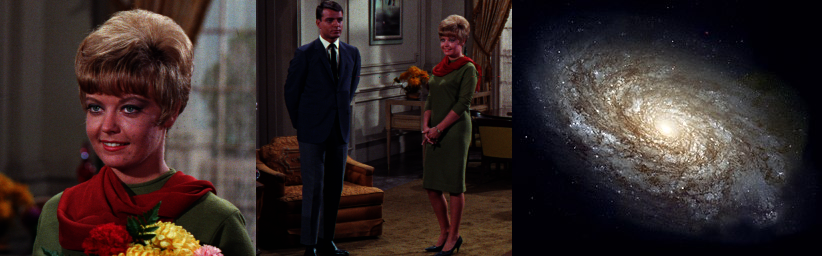

In [40]:
cv2_imshow(cv.hconcat([imgFemale, imgCouple, imgGalaxy]))

## Praktikum No 1
1. Buat Gamma Correction

In [19]:
imgNo1 = imgFemale.copy()

In [20]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv.LUT(image, table)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


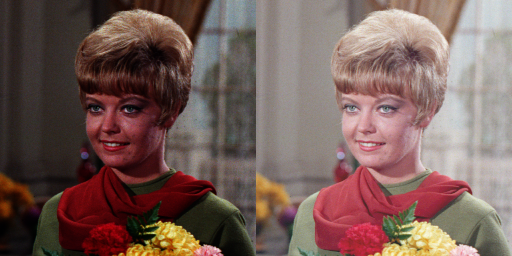

In [21]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gammaInput = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

adjusted = adjust_gamma(imgNo1, gamma=gammaInput)
cv2_imshow(np.hstack([imgNo1, adjusted]))

## Praktikum No 2
2. Simulasi Depth Image

In [22]:
imgNo2 = imgFemale.copy()

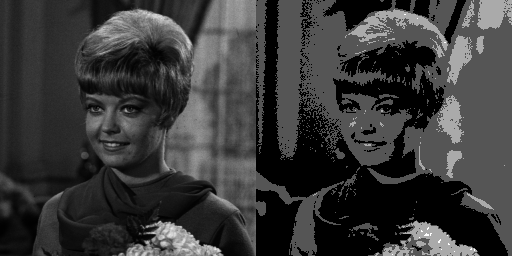

In [23]:
bit_depth = 2
level = (255/(2**(bit_depth)-1))
original = imgNo2.copy()
original = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
depth_image = np.zeros(original.shape,original.dtype)

for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    depth_image[i,j] = round((original[i,j]/level))*level

final_frame = cv.hconcat((original,depth_image))
cv2_imshow(final_frame)

## Praktikum No 3
 3. Modul Average Denoising

In [59]:
import glob
imgNo3 =[]
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  imgNo3.append(n)

In [60]:
def PNSR(img1,img2):
  mse = np.mean((img1-img2)**2)
  if mse == 0:
    return 100
  max_pixel = 255.0
  psnr = 20*np.log10(max_pixel/np.sqrt(mse))
  return psnr

def averageDenoising(index):
  denoised_image = np.zeros_like(imgNo3[0], dtype=np.float32)
  for i in range(index):
    denoised_image += imgNo3[i].astype(np.float32)

  return denoised_image

29.111317631956396


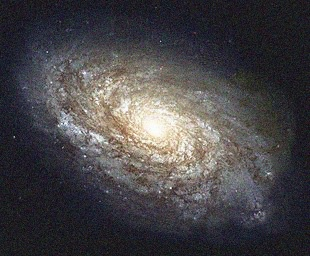

In [73]:
denoised_image_5 = averageDenoising(5)
denoised_image_5 /= 5
denoised_image_5 = np.uint8(denoised_image_5)
print(PNSR(imgNo3[0],denoised_image_5))
cv2_imshow(denoised_image_5)

29.01150311708355


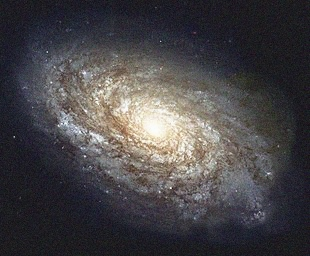

In [72]:
denoised_image_10 = averageDenoising(10)
denoised_image_10 /= 10
denoised_image_10 = np.uint8(denoised_image_10)
print(PNSR(imgNo3[0],denoised_image_10))
cv2_imshow(denoised_image_10)

28.94754955146597


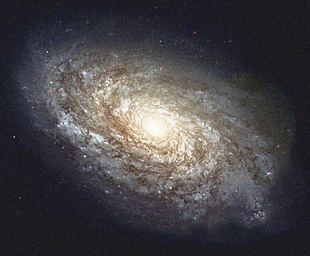

In [71]:
denoised_image_20 = averageDenoising(20)
denoised_image_20 /= 20
denoised_image_20 = np.uint8(denoised_image_20)
print(PNSR(imgNo3[0],denoised_image_20))
cv2_imshow(denoised_image_20)

28.926875293666914


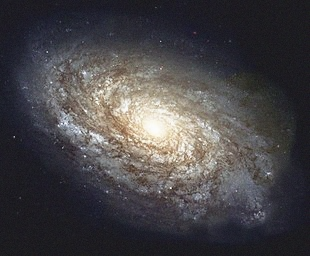

In [70]:
denoised_image_40 = averageDenoising(40)
denoised_image_40 /= 40
denoised_image_40 = np.uint8(denoised_image_40)
print(PNSR(imgNo3[0],denoised_image_40))
cv2_imshow(denoised_image_40)

28.919385017174555


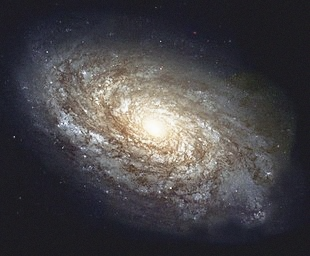

In [69]:
denoised_image_80 = averageDenoising(80)
denoised_image_80 /= 80
denoised_image_80 = np.uint8(denoised_image_80)
print(PNSR(imgNo3[0],denoised_image_80))
cv2_imshow(denoised_image_80)

28.91734513032903


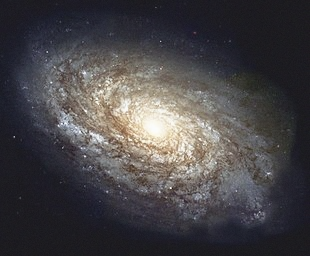

In [68]:
denoised_image_100 = averageDenoising(100)
denoised_image_100 /= 100
denoised_image_100 = np.uint8(denoised_image_100)
print(PNSR(imgNo3[0],denoised_image_100))
cv2_imshow(denoised_image_100)

## Praktikum No 4
4. Image Masking

In [35]:
imgNo4 = imgCouple.copy()
imgNo4 = cv.cvtColor(imgNo4, cv.COLOR_BGR2RGB)

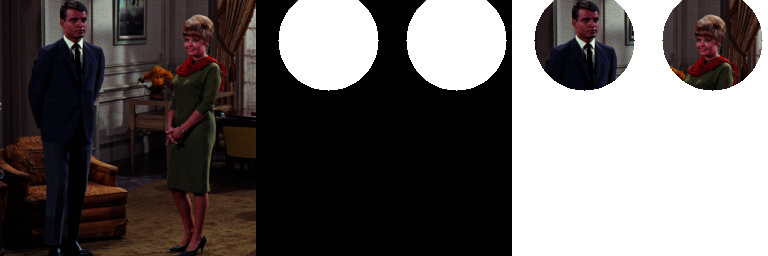

In [38]:
mask = np.zeros(imgNo4.shape, dtype=np.uint8)
mask = cv.circle(mask, (72, 40), 50, (255,255,255), -1)
mask = cv.circle(mask, (200, 40), 50, (255,255,255), -1)

# Mask input imgNo4 with binary mask
result = cv.bitwise_and(imgNo4, mask)
# Color background white
result[mask==0] = 255

imgNo4 = cv.cvtColor(imgNo4, cv.COLOR_BGR2RGB)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
cv2_imshow(cv.hconcat([imgNo4, mask, result]))